# Exploratory Data Analysis on Haberman's Survival Dataset

## Haberman Survival Dataset

### Dataset Source
The dataset has been downloaded from the following website :

https://www.kaggle.com/gilsousa/habermans-survival-data-set

### Description of the  dataset
The dataset consists of cases which were obtained from a survey that was conducted between 1958 and 1970 at the University of  Chicago's Billings Hospital in order to study the survival of patients who had undergone surgery for breast cancer.

### Attributes present in the dataset and their description
1. Age : Age of the patient at time of operation (numerical)
2. Operation_Year : Patient's year of operation (year - 1900, numerical)
3. axil_node : Number of positive axillary nodes detected (numerical)
4. Surv_status : Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year




# Objective

This is a classification based problem. The main task is to predict whether a patient will survive >= 5 years or < 5 years after the operation based on the following features or parameters :
<br> 1) Age of the patient during the operation <br/>
<br>2) Year of operation or operation year <br/>
<br>3) Number of positive axillary nodes which have been detected<br/>

In [91]:
# import the Python libraries which will provide the functions that enable us to perform the Exploratory Data Analysis 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Read the dataset from the csv file
haberman_data = pd.read_csv("haberman.csv")
# Test whether the dataset has been loaded properly without any error
haberman_data.head(5)   # View the first 5 rows of the dataset (5 by default)


,Age,Operation_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [54]:
haberman_data.tail(5)   # View the last 5 rows of the dataset (5 by default)

,Age,Operation_Year,axil_nodes,Surv_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [55]:
haberman_data  # View the entire dataset

,Age,Operation_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


## Observation
The dataset contains 306 rows and 4 columns. Hence there are 306 datapoints , 3 features and 1 class label. 

This measurement can also be obtained without printing the entire dataset as a  frame by using the below code:

In [56]:
haberman_data.shape  # Here the number of rows and columns are given as a tuple. The first part represent the number of rows and the second part represents the number of columns

(306, 4)

In [57]:
# The columns which are present in the dataset
haberman_data.columns

Index(['Age', 'Operation_Year', 'axil_nodes', 'Surv_status'], dtype='object')

In [58]:
# Finding the number of values or data present for each type of class
haberman_data['Surv_status'].value_counts()


1    225
2     81
Name: Surv_status, dtype: int64

In [59]:
# Finding the percentage of datapoints for each type of class
print("the percentage of datapoints for each type of class are:")
haberman_data['Surv_status'].value_counts() * 100 / haberman_data.shape[0]

the percentage of datapoints for each type of class are:


1    73.529412
2    26.470588
Name: Surv_status, dtype: float64

## Observation 

1) The entire dataset contain two classes based on Surv_status: Class 1 and Class 2. **Class 1** refers to those patients who survived 5 years or longer after the operation and **Class 2** refers to those patients who survived less than 5 years or died within 5 years of operation.

2) From the code in In[12] we can infer that :
    <p>a) There are **225 datapoints** that belong to **Class 1** and **81 datapoints** that belong to **Class 2**.</p>
    <p>a) There are approximately ** 74% of datapoints** that belong to **Class 1** and **26% of datapoints** that belong to **Class 2**.</p>
    <p>b) Since the number of datapoints that belong to each class differ substantially or since there is a very large 
           difference between the number of datapoints that belong to each class, the **Haberman Survival dataset** is an  
           **imbalanced dataset**.

In [60]:
# Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
#For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.
#For datapoints belonging to class 1
haberman_data_survive = haberman_data.loc[haberman_data['Surv_status']==1]
print("Generalied statistics of patients who survived greater than or equal to 5 years")
haberman_data_survive.describe()

Generalied statistics of patients who survived greater than or equal to 5 years


,Age,Operation_Year,axil_nodes,Surv_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [61]:
# For datapoints belonging to class 2
haberman_data_dead = haberman_data.loc[haberman_data['Surv_status']==2]
print("Generalied statistics of patients who died within 5 years")
haberman_data_dead.describe()

Generalied statistics of patients who died within 5 years


,Age,Operation_Year,axil_nodes,Surv_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [62]:
# Code to Compare the statistics between the two based on the feature: Age
surv_stat = haberman_data_survive['Age'].describe()
dead_stat = haberman_data_dead['Age'].describe()
dataFrame_age = pd.DataFrame(data={'Survived >=5 years': surv_stat,'Survived < 5 years': dead_stat})
print("Compare the statistics based on Age of the patient")
dataFrame_age

Compare the statistics based on Age of the patient


,Survived < 5 years,Survived >=5 years
count,81.000000,225.000000
mean,53.679012,52.017778
std,10.167137,11.012154
min,34.000000,30.000000
25%,46.000000,43.000000
50%,53.000000,52.000000
75%,61.000000,60.000000
max,83.000000,77.000000


In [63]:
# Code to Compare the statistics between the two based on the feature: Operation_Year
surv_stat = haberman_data_survive['Operation_Year'].describe()
dead_stat = haberman_data_dead['Operation_Year'].describe()
dataFrame_opy = pd.DataFrame(data={'Survived >=5 years': surv_stat,'Survived < 5 years': dead_stat})
print("Compare the statistics based on Year of Operation of the patient")
dataFrame_opy

Compare the statistics based on Year of Operation of the patient


,Survived < 5 years,Survived >=5 years
count,81.000000,225.000000
mean,62.827160,62.862222
std,3.342118,3.222915
min,58.000000,58.000000
25%,59.000000,60.000000
50%,63.000000,63.000000
75%,65.000000,66.000000
max,69.000000,69.000000


In [64]:
# Code to Compare the statistics between the two based on the feature: Number of detected positive axxil_nodes
surv_stat = haberman_data_survive['axil_nodes'].describe()
dead_stat = haberman_data_dead['axil_nodes'].describe()
dataFrame_axln = pd.DataFrame(data={'Survived >=5 years': surv_stat,'Survived < 5 years': dead_stat})
print("Compare the statistics based on the number of detected positive axillary nodes of the patient")
dataFrame_axln

Compare the statistics based on the number of detected positive axillary nodes of the patient


,Survived < 5 years,Survived >=5 years
count,81.000000,225.000000
mean,7.456790,2.791111
std,9.185654,5.870318
min,0.000000,0.000000
25%,1.000000,0.000000
50%,4.000000,0.000000
75%,11.000000,3.000000
max,52.000000,46.000000


## Observation

If we observe the outputs of Out[13] and Out[14] for class 1 and class 2 respectively  we can infer the following results:

<p> 1) The various statistics of the features: **Age** and **Operation_Year** have almost the similar results but the results  
       related to the feature **axil_nodes** of both the classes are significantly different. </p>
 <p> 2) All patients whose age is >=30 and less than 34,after the time of operation, have survived for >=5 years </p> 
 <p> 3) No patients of age > 77,after the operation, have survived for >=5years
 <p> 4)  Analysis of the feature **axil_nodes** :  
       <br> a> The mean of the number of positive axillary nodes in both the classes substantially differ from each other.<br/>
       <br> b> The std of the number of positive axillary nodes in both the classes also differ from each other.<br/>
       <br> c> 75% of the patients who survived greater than or equal to 5 years had positive axillary nodes approximately less 
               than or equal to 3. 75% of the patients who died within 5 years had positive axillary nodes less than or equal to 
               11. Thus patients with less number of positive axillary nodes had higher chance or probability of survival.  <br/>
       <br> d> From the previous point it may seem that the number of detected positive axillary nodes is suitable for 
               determining the survival status of the patients, but this is not entirely true. This is because there were
               cases where the patients had died within 5 years even when there were no positive axillary nodes detected within 
               them. This can be inferred when we observe the minimum number of axillary nodes detected when the patients have 
               died within 5 years of age  <br/> </p>         

# 1. Univariate Analysis based on the feature:  Age 

##  1.1 Histogram along with Probability Distribution Function (PDF)

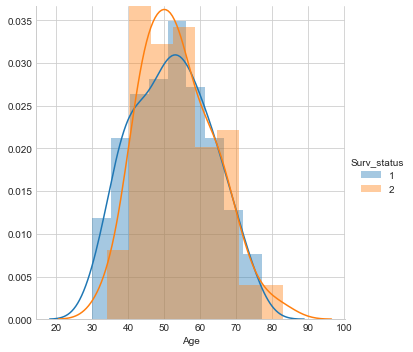

In [65]:
# Code to draw histogram along with pdf and legends 
sns.FacetGrid(haberman_data,hue="Surv_status",size=5)\
   .map(sns.distplot,"Age")\
   .add_legend();
plt.show()

## 1.2 Probability Density Function (PDF) along with Cumulative Density Function(CDF) 

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


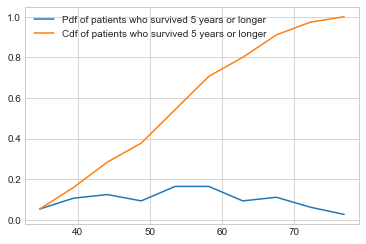

In [66]:
# Code to draw pdf and cdf of patients who survived greater than or equal to 5 years 
counts, bin_edges = np.histogram(haberman_data_survive['Age'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf of patients who survived 5 years or longer','Cdf of patients who survived 5 years or longer'])
plt.show()

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


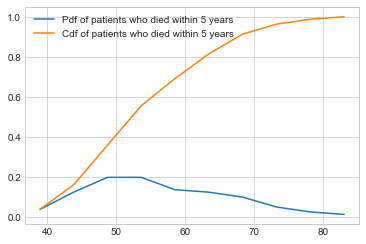

In [67]:
# Code to draw pdf and cdf of patients who died within 5 years 
counts, bin_edges = np.histogram(haberman_data_dead['Age'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf of patients who died within 5 years','Cdf of patients who died within 5 years'])
plt.show()

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


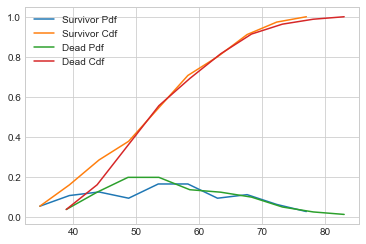

In [68]:
# Code to draw pdf and cdf of patients who survived greater than or equal to 5 years and who died within 5 years based on Age and compare them 
counts, bin_edges = np.histogram(haberman_data_survive['Age'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(haberman_data_dead['Age'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Survivor Pdf ','Survivor Cdf ','Dead Pdf ','Dead Cdf '])
plt.show()


## 1.3 Box Plot 

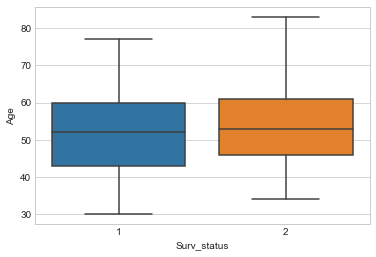

In [69]:
# Code to draw the box plot based on the feature Age
sns.boxplot(x='Surv_status',y='Age', data=haberman_data)
plt.show()

## 1.4 Violin Plot

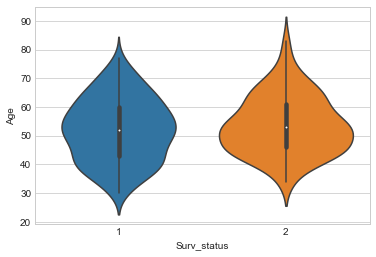

In [70]:
# Code to draw the violin plot based on the feature Age
sns.violinplot(x="Surv_status", y="Age", data=haberman_data, size=8)
plt.show()

## Observation

 On performing Univariate analysis based on the feature, **Age of the patient**, we can observe that:
 <p> 1) We have obtained almost similar plots for both the classes</p>
 <p> 2) There is a huge overlap of the plots and thus it is not possible to perform the classification of the datapoints </p>
 <p> 3) Age of the patient is not an important or suitable parameter in determining the duration of survival of the patients. </p>
 
## Conclusion

Thus it is not possible to perform the classification task based on the ** Patient Age ** feature
 

# 2. Univariate Analysis based on the feature:  Operation_Year

##  2.1 Histogram along with Probability Distribution Function (PDF)

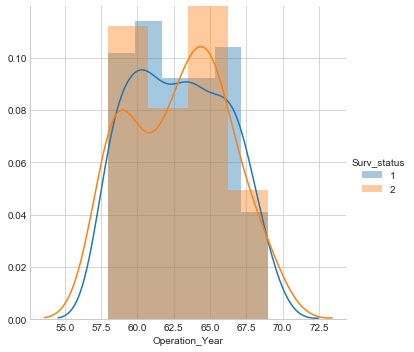

In [71]:
# Code to draw histogram along with pdf and legends 
sns.FacetGrid(haberman_data,hue="Surv_status",size=5)\
   .map(sns.distplot,"Operation_Year")\
   .add_legend();
plt.show()

## 2.2 Probability Density Function (PDF) along with Cumulative Density Function(CDF) 

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


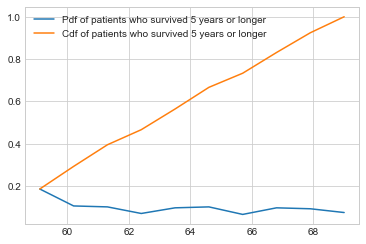

In [72]:
# Code to draw pdf and cdf of patients who survived greater than or equal to 5 years 
counts, bin_edges = np.histogram(haberman_data_survive['Operation_Year'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf of patients who survived 5 years or longer','Cdf of patients who survived 5 years or longer'])
plt.show()

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


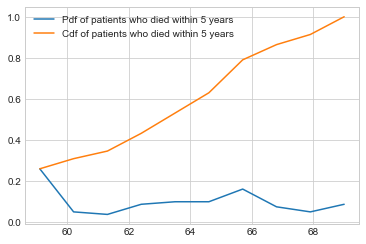

In [73]:
# Code to draw pdf and cdf of patients who died within 5 years 
counts, bin_edges = np.histogram(haberman_data_dead['Operation_Year'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf of patients who died within 5 years','Cdf of patients who died within 5 years'])
plt.show()

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


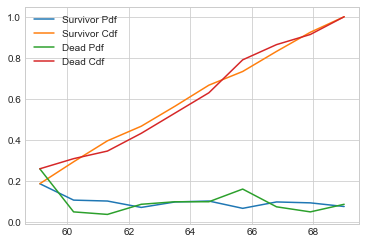

In [74]:
# Code to draw pdf and cdf of patients who survived greater than or equal to 5 years and who died within 5 years based on Age and compare them 
counts, bin_edges = np.histogram(haberman_data_survive['Operation_Year'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(haberman_data_dead['Operation_Year'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Survivor Pdf ','Survivor Cdf ','Dead Pdf ','Dead Cdf '])
plt.show()


## 2.3 Box Plot 

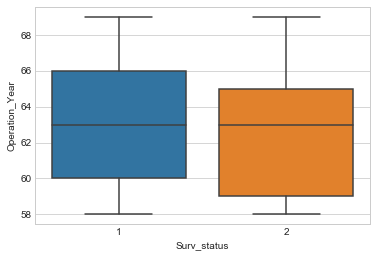

In [75]:
# Code to draw the box plot based on the feature Operation_Year
sns.boxplot(x='Surv_status',y='Operation_Year', data=haberman_data)
plt.show()

## 2.4 Violin Plot

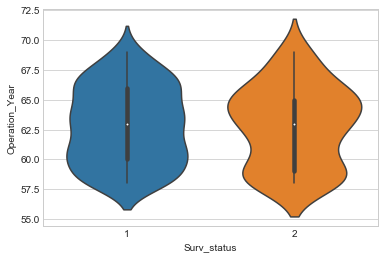

In [76]:
# Code to draw the violin plot based on the feature Operation_Year
sns.violinplot(x="Surv_status", y="Operation_Year", data=haberman_data, size=8)
plt.show()

## Observation

 On performing Univariate analysis based on the feature, **Year of Operation of the patient**, we can observe that:
 <p> 1) We have obtained almost similar plots for both the classes</p>
 <p> 2) There is a huge overlap of the plots and thus it is not possible to perform the classification of the datapoints </p>
 <p> 3) Operation_Year of the patient is not an important or suitable parameter in determining the duration of survival of the patients. </p>
 
## Conclusion

Thus it is not possible to perform the classification task based on the ** Operation_Year ** feature


# 3. Univariate Analysis based on the feature: Axil_Nodes

##  3.1 Histogram along with Probability Distribution Function (PDF)

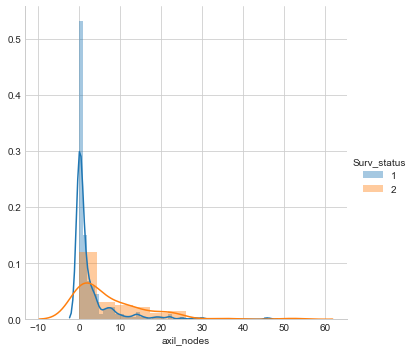

In [77]:
# Code to draw histogram along with pdf and legends 
sns.FacetGrid(haberman_data,hue="Surv_status",size=5)\
   .map(sns.distplot,"axil_nodes")\
   .add_legend();
plt.show()

## 3.2 Probability Density Function (PDF) along with Cumulative Density Function(CDF) 

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


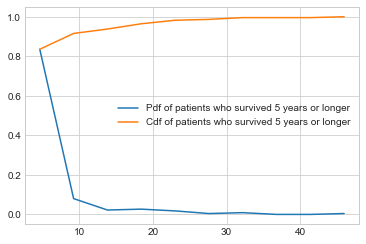

In [78]:
# Code to draw pdf and cdf of patients who survived greater than or equal to 5 years 
counts, bin_edges = np.histogram(haberman_data_survive['axil_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf of patients who survived 5 years or longer','Cdf of patients who survived 5 years or longer'])
plt.show()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


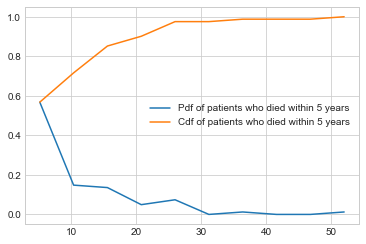

In [79]:
# Code to draw pdf and cdf of patients who died within 5 years 
counts, bin_edges = np.histogram(haberman_data_dead['axil_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf of patients who died within 5 years','Cdf of patients who died within 5 years'])
plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


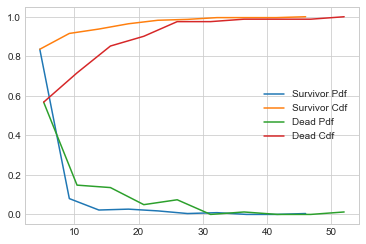

In [80]:
# Code to draw pdf and cdf of patients who survived greater than or equal to 5 years and who died within 5 years based on Age and compare them 
counts, bin_edges = np.histogram(haberman_data_survive['axil_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(haberman_data_dead['axil_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Survivor Pdf ','Survivor Cdf ','Dead Pdf ','Dead Cdf '])
plt.show()


## 3.3 Box Plot 

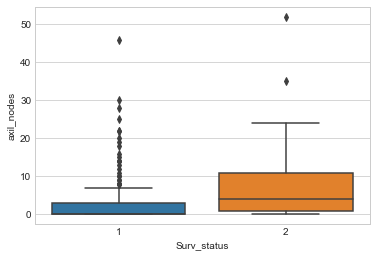

In [81]:
# Code to draw the box plot based on the feature axil_nodes
sns.boxplot(x='Surv_status',y='axil_nodes', data=haberman_data)
plt.show()

## 3.4 Violin Plot

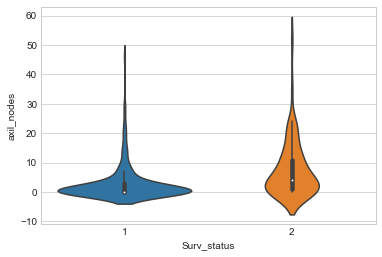

In [82]:
# Code to draw the violin plot based on the feature axil_nodes
sns.violinplot(x="Surv_status", y="axil_nodes", data=haberman_data, size=8)
plt.show()

In [83]:
print("% of patients who survived >= 5 years had zero positive axillary nodes = {}".format(len(haberman_data_survive[haberman_data_survive['axil_nodes']==0])*100 / len(haberman_data_survive) ))
print("% of patients who survived < 5 years had zero positive axillary nodes = {}".format(len(haberman_data_dead[haberman_data_dead['axil_nodes']==0])*100 / len(haberman_data_dead) ))


% of patients who survived >= 5 years had zero positive axillary nodes = 52.0
% of patients who survived < 5 years had zero positive axillary nodes = 23.45679012345679


## Observation

 On performing Univariate analysis based on the feature, **Number of detected positive axil_nodes**, we can observe that:
 <p> 1) The plots obtained for both the classes do not exactly overlap with each other but at the same time it is not possible to draw any inference which can enable us to perform the classification task </p>
 <p> 2) Overlap of data points is less compared to other features, but overlap still exist thus it is difficult to set a threshold for positive axillary nodes which will differentiate both class of patients</p>
 <p> 3) About 52% of the patients who survived >= 5 years almost had no positive axillary nodes</p>
 <p> 4) As number of positive axillary nodes increase the chance of survival decreases </p> 
 <p> 5) Major portion of the plots overlap with each other and thus it is not possible to perform the classification of the datapoints </p>
 <p> 6) The error percentage will be very high and the accuracy will be very low. </p>
 <p> 7) Small percentage i.e 23% of patients(survived < 5 years) who had no positive axillary nodes died within 5 years of operation , thus absence of 
     positive axillary nodes cannot always guarentee survival </p>
 
## Conclusion

Thus it is not possible to perform the classification task based on the ** Number of detected positive axil_nodes ** feature


# BiVariate Analysis of Haberman Data

## 1.  Pair Plot

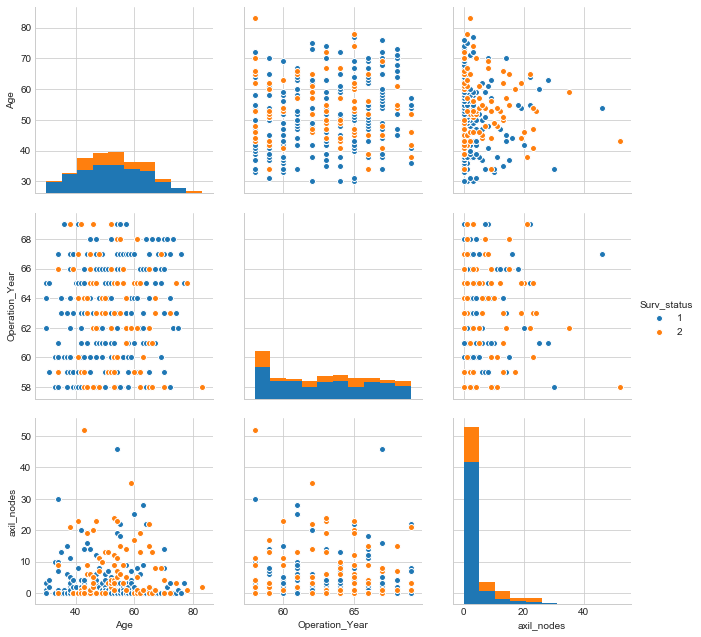

In [84]:
# Code to draw the pair plots based on all the features present in the dataset 
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman_data, hue="Surv_status",vars=['Age','Operation_Year','axil_nodes'] ,size=3);
plt.show()

## Observation

<p> 1) Axillary nodes doesn't depend on patients age </p>
<p> 2) Age does not depend on year of operation of the patients </p>
<p> 3) Number of detected Axillary nodes also does not depend on year of operation of the patients in any way </p>
<p> 4) It is difficult to classify the survival status of the patients based on these features.


# MultiVariate Analysis
## Contour Plots

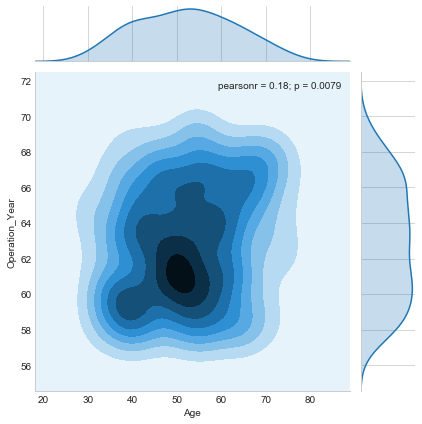

In [85]:
sns.jointplot(x="Age", y="Operation_Year", data=haberman_data_survive, kind="kde");
plt.show();


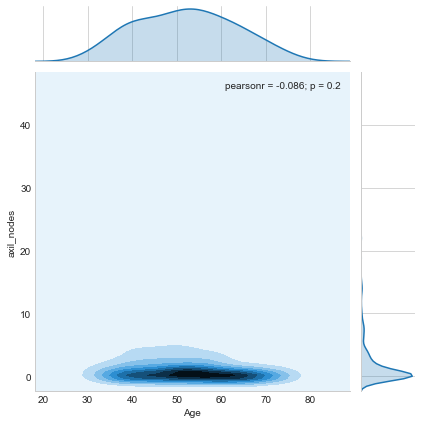

In [86]:
sns.jointplot(x="Age", y="axil_nodes", data=haberman_data_survive, kind="kde");
plt.show();


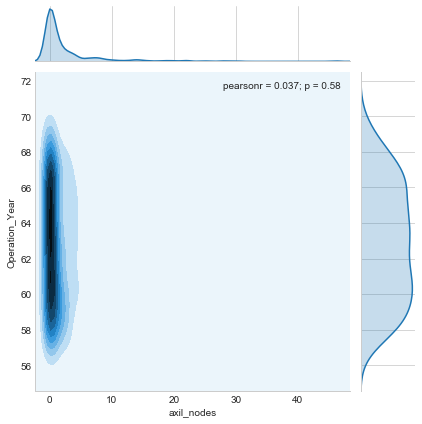

In [87]:
sns.jointplot(x="axil_nodes", y="Operation_Year", data=haberman_data_survive, kind="kde");
plt.show();


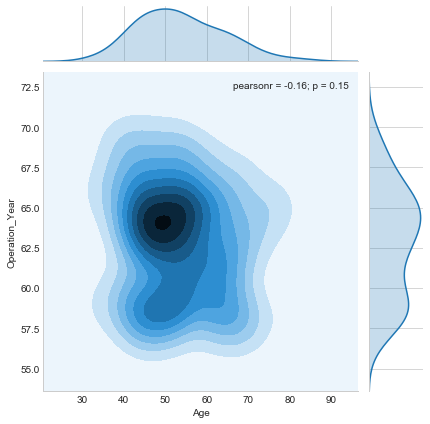

In [88]:
sns.jointplot(x="Age", y="Operation_Year", data=haberman_data_dead, kind="kde");
plt.show();


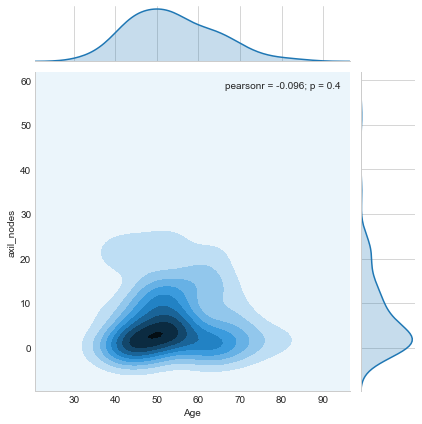

In [89]:
sns.jointplot(x="Age", y="axil_nodes", data=haberman_data_dead, kind="kde");
plt.show();


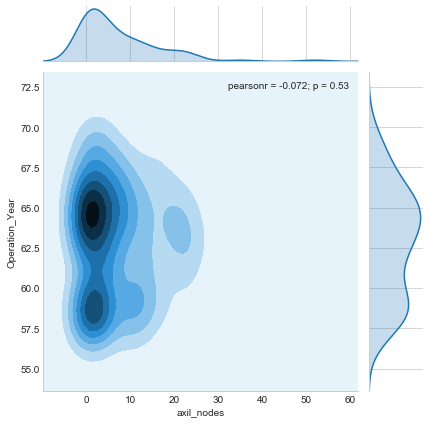

In [90]:
sns.jointplot(x="axil_nodes", y="Operation_Year", data=haberman_data_dead, kind="kde");
plt.show();


## Observation

There is no dependency between any of the two features.

## Conclusions

1) The Age of the patients alone is not the deciding factor for the duration of the survival of the patients.

2) As the number of positive axillary nodes increase the chance of survival of patient decrease at the same time having zero postivie axillary nodes doesn't guarentee survival as there are cases where patients with zero positive axillary nodes couldn't survive 5 years from the time of operation.

3) Even if we could come up with a simple model which could predict the survival of a patient based on the insights we got , the chance of misclassification is high and the error of the model will be very high .

4)The objective of classifying the survival status of a new patient based on given features is a very exasperating task as none of the features either alone or in combination can not provide us the required conditions that can enable us to perform the classification.